In [1]:
import pandas as pd 

import os
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
data_2022 = pd.read_csv("Game_data/2022_LoL_esports_match_data_from_OraclesElixir_20221016.csv")
data_2021 = pd.read_csv("Game_data/2021_LoL_esports_match_data_from_OraclesElixir_20221016.csv")
data_2020 = pd.read_csv("Game_data/2020_LoL_esports_match_data_from_OraclesElixir_20221016.csv")
data_2019 = pd.read_csv("Game_data/2019_LoL_esports_match_data_from_OraclesElixir_20221016.csv")

/Users/alexandreberkovic/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## ETL

In [3]:
together = pd.concat([data_2019, data_2020, data_2021, data_2022], axis = 0)

In [4]:
together.reset_index(inplace = True)

In [5]:
together.head()

,index,gameid,datacompleteness,url,league,year,split,playoffs,date,game,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,0,ESPORTSTMNT01/1030526,complete,https://matchhistory.br.leagueoflegends.com/pt...,CBLOL,2019,Split 1,0,2019-01-12 14:56:22,1.0,...,133.0,-549.0,-276.0,-3.0,1.0,0.0,1.0,3.0,0.0,1.0
1,1,ESPORTSTMNT01/1030526,complete,https://matchhistory.br.leagueoflegends.com/pt...,CBLOL,2019,Split 1,0,2019-01-12 14:56:22,1.0,...,84.0,439.0,-21.0,-14.0,2.0,4.0,2.0,0.0,0.0,1.0
2,2,ESPORTSTMNT01/1030526,complete,https://matchhistory.br.leagueoflegends.com/pt...,CBLOL,2019,Split 1,0,2019-01-12 14:56:22,1.0,...,125.0,-170.0,-675.0,-1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,3,ESPORTSTMNT01/1030526,complete,https://matchhistory.br.leagueoflegends.com/pt...,CBLOL,2019,Split 1,0,2019-01-12 14:56:22,1.0,...,120.0,1691.0,1692.0,20.0,3.0,4.0,0.0,0.0,1.0,3.0
4,4,ESPORTSTMNT01/1030526,complete,https://matchhistory.br.leagueoflegends.com/pt...,CBLOL,2019,Split 1,0,2019-01-12 14:56:22,1.0,...,6.0,1168.0,671.0,20.0,1.0,6.0,1.0,1.0,0.0,2.0


In [6]:
# filter data to be in leagues: LCS,LCK,LPL,LEC 
 
# together = together[together['league'].isin(['LCS','LCK','LPL','LEC'])]

league_filtered = together[together['league'].isin(["LCS", "LCK", "LPL", "LEC"])]

In [7]:
team_filtered = league_filtered[league_filtered['playerid'].isna()]

In [8]:
relevant_columns = ['gameid', 'position', 'playerid', 'teamid', 
                    'champion', 'ban1', 'ban2', 'ban3', 'ban4', 
                    'ban5', 'kills', 'deaths', 'assists', 'teamkills', 
                    'teamdeaths',  'doublekills', 
                    'triplekills', 'quadrakills', 'pentakills', 'firstblood',
                    'firstbloodkill', 'firstbloodassist', 'team kpm', 'ckpm',
                    'firstdragon', 'dragons', 'opp_dragons', 'elementaldrakes',
                    'opp_elementaldrakes', 'elders', 'opp_elders', 'firstherald', 'heralds',
                    'opp_heralds', 'firstbaron', 'barons', 'opp_barons', 'firsttower',
                    'towers', 'opp_towers', 'firstmidtower', 'firsttothreetowers',
                    'turretplates', 'opp_turretplates', 'inhibitors', 'opp_inhibitors',
                    'damagetochampions', 'dpm', 'damageshare', 'damagetakenperminute',
                    'damagemitigatedperminute', 'wardsplaced', 'wpm', 'wardskilled',
                    'wcpm', 'controlwardsbought','vspm', 'totalgold',
                    'earnedgold', 'earned gpm', 'earnedgoldshare', 'goldspent', 'gspd',
                     'minionkills', 'monsterkills', 'cspm', 'goldat10', 'xpat10',
                    'csat10', 'opp_goldat10', 'opp_xpat10', 'opp_csat10', 'golddiffat10', 'xpdiffat10',
                    'csdiffat10', 'killsat10', 'assistsat10', 'deathsat10', 'opp_killsat10', 'opp_assistsat10',
                    'opp_deathsat10', 'goldat15', 'xpat15', 'csat15', 'opp_goldat15', 'opp_xpat15', 'opp_csat15',
                    'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15', 'assistsat15', 'opp_killsat15'
                    ]


relevant_columns = sorted(relevant_columns)
print(sorted(relevant_columns))

filtered_y = team_filtered.loc[:, 'result']
filtered = team_filtered.loc[:, relevant_columns]

['assists', 'assistsat10', 'assistsat15', 'ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'barons', 'champion', 'ckpm', 'controlwardsbought', 'csat10', 'csat15', 'csdiffat10', 'csdiffat15', 'cspm', 'damagemitigatedperminute', 'damageshare', 'damagetakenperminute', 'damagetochampions', 'deaths', 'deathsat10', 'doublekills', 'dpm', 'dragons', 'earned gpm', 'earnedgold', 'earnedgoldshare', 'elders', 'elementaldrakes', 'firstbaron', 'firstblood', 'firstbloodassist', 'firstbloodkill', 'firstdragon', 'firstherald', 'firstmidtower', 'firsttothreetowers', 'firsttower', 'gameid', 'goldat10', 'goldat15', 'golddiffat10', 'golddiffat15', 'goldspent', 'gspd', 'heralds', 'inhibitors', 'kills', 'killsat10', 'killsat15', 'minionkills', 'monsterkills', 'opp_assistsat10', 'opp_barons', 'opp_csat10', 'opp_csat15', 'opp_deathsat10', 'opp_dragons', 'opp_elders', 'opp_elementaldrakes', 'opp_goldat10', 'opp_goldat15', 'opp_heralds', 'opp_inhibitors', 'opp_killsat10', 'opp_killsat15', 'opp_towers', 'opp_turretplates'

In [9]:
categorical_features = ['ban1', 'ban2', 'ban3', 'ban4', 'ban5', 'champion', 'teamid', 'playerid', 'position', 'gameid']

In [10]:
filtered_cat = filtered.loc[:, ~filtered.columns.isin(categorical_features)]

In [11]:
filtered

,assists,assistsat10,assistsat15,ban1,ban2,ban3,ban4,ban5,barons,champion,...,turretplates,vspm,wardskilled,wardsplaced,wcpm,wpm,xpat10,xpat15,xpdiffat10,xpdiffat15
106,64,3.0,3.0,Galio,Irelia,Gragas,Alistar,Fiddlesticks,1.0,NaN,...,NaN,7.0156,51.0,106.0,1.4427,2.9986,19462.0,30107.0,1286.0,45.0
107,37,4.0,10.0,Cassiopeia,Lucian,Rakan,Kalista,Caitlyn,0.0,NaN,...,NaN,6.5347,44.0,104.0,1.2447,2.9420,18176.0,30062.0,-1286.0,-45.0
118,24,1.0,2.0,Rakan,LeBlanc,Lissandra,Gragas,Urgot,0.0,NaN,...,NaN,6.5224,42.0,83.0,1.3298,2.6280,18670.0,29659.0,-477.0,-1439.0
119,54,1.0,5.0,Cassiopeia,Lucian,Aatrox,Morgana,Viktor,1.0,NaN,...,NaN,5.9525,33.0,93.0,1.0449,2.9446,19147.0,31098.0,477.0,1439.0
130,38,3.0,3.0,Caitlyn,Camille,Lucian,Alistar,Thresh,1.0,NaN,...,NaN,7.3642,48.0,95.0,1.4487,2.8672,19347.0,29576.0,1374.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499787,7,0.0,1.0,Sejuani,Kalista,Yuumi,Trundle,Wukong,0.0,NaN,...,6.0,7.5135,61.0,90.0,2.2035,3.2511,17796.0,27929.0,-1739.0,-2604.0
499822,14,7.0,11.0,Sejuani,LeBlanc,Azir,Kennen,Gangplank,0.0,NaN,...,1.0,6.7917,25.0,73.0,1.0047,2.9337,16692.0,28297.0,15.0,917.0
499823,62,2.0,2.0,Senna,Kalista,Renekton,Taliyah,Ornn,1.0,NaN,...,5.0,5.8272,24.0,70.0,0.9645,2.8131,16677.0,27380.0,-15.0,-917.0
499834,27,3.0,7.0,Sejuani,LeBlanc,Yuumi,Kennen,Gangplank,0.0,NaN,...,2.0,6.2333,32.0,107.0,1.0667,3.5667,16172.0,26600.0,-771.0,-1700.0


## Initial EDA

In [12]:
df = league_filtered

In [13]:
# remove rows with no champion
df = df[df["champion"].notna()]

In [14]:
# reset index of df
df.reset_index(inplace = True)

In [15]:
#  column names of filtered 
df["champion"].unique()

array(['Aatrox', 'Kayn', 'Lissandra', 'Sivir', 'Thresh', 'Urgot',
       'Sejuani', 'Akali', "Kai'Sa", 'Braum', 'Camille', 'Irelia',
       'Ezreal', 'Vladimir', 'Zac', 'Jayce', 'Alistar', 'Yasuo', 'Varus',
       'Tahm Kench', 'Sion', 'Gragas', 'Nautilus', 'Kled', 'Kalista',
       'Xin Zhao', 'Syndra', 'Xayah', 'Rakan', 'Lee Sin', 'Zilean',
       'Viktor', 'Nidalee', 'Aurelion Sol', 'Caitlyn', 'Morgana', 'Zoe',
       'Galio', 'Jax', "Kha'Zix", 'Poppy', 'Lucian', 'Ryze', 'Renekton',
       'Jarvan IV', 'Gangplank', 'Cassiopeia', "Vel'Koz", 'Olaf', 'Leona',
       'Taliyah', 'Rumble', 'Ashe', 'Elise', 'Darius', 'Fiora',
       'Nocturne', 'Karthus', 'Pyke', 'Kennen', 'Draven', 'Evelynn',
       'Ornn', 'Taric', 'Lulu', 'Tristana', 'Vayne', 'Jhin', 'Swain',
       "Rek'Sai", 'Fiddlesticks', 'LeBlanc', 'Neeko', 'Soraka', 'Jinx',
       'Malzahar', 'Shen', 'Annie', "Kog'Maw", 'Nunu & Willump', 'Azir',
       'Ziggs', 'Karma', 'Ivern', 'Riven', 'Xerath', 'Corki', 'Kindred',
       'Trund

/Users/alexandreberkovic/opt/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


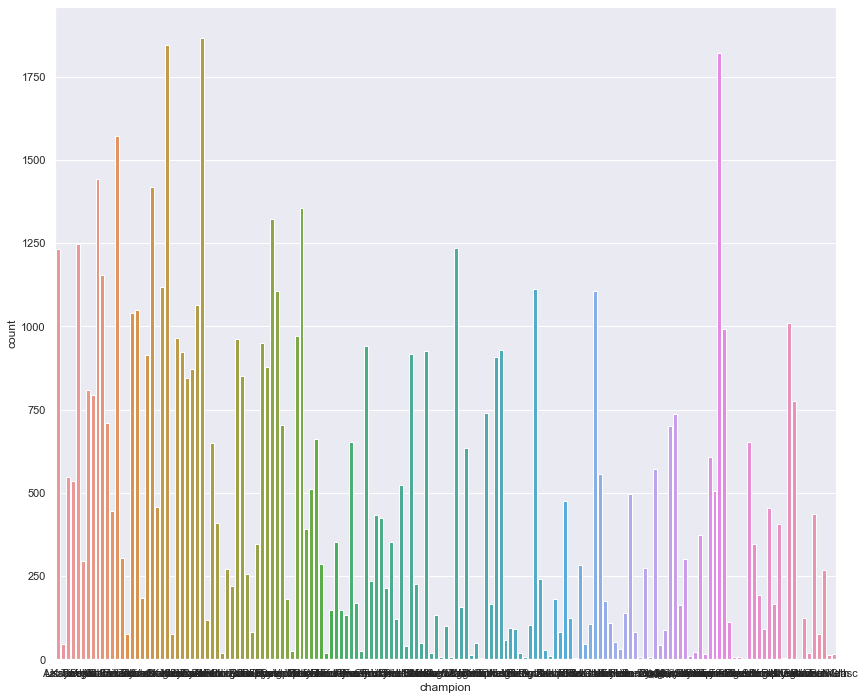

In [16]:
# increase size of sns plot
sns.set(rc={'figure.figsize':(14,12)})

sns.countplot(df['champion'], label="Count")
plt.show()

In [19]:
# show all columns
pd.set_option('display.max_columns', None)
df.head()

,level_0,index,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,96,96,4268-5346,complete,https://lpl.qq.com/es/stats.shtml?bmid=4268,LPL,2019,Spring,0,2019-01-14 09:24:00,1.0,9.01,1,Blue,top,Duke,oe:player:1a8b6a662905090813591d4993feefa,Invictus Gaming,oe:team:53a258f289c26d94431c0496a54e151,Aatrox,Galio,Irelia,Gragas,Alistar,Fiddlesticks,2121,1,4,2,12,22,15,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.6223,1.0467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16275.0,460.3960,0.186358,574.9646,437.1994,13.0,0.3678,2.0,0.0566,1.0,21.0,0.5941,13151.0,8549.0,241.8388,0.189049,12950.0,NaN,237.0,217.0,20.0,15.0,0.0,6.7044,3502.0,4573.0,87.0,3695.0,4588.0,74.0,-193.0,-15.0,13.0,0.0,1.0,1.0,2.0,0.0,1.0,5562.0,7233.0,136.0,5581.0,7534.0,124.0,-19.0,-301.0,12.0,0.0,1.0,1.0,2.0,2.0,1.0
1,97,97,4268-5346,complete,https://lpl.qq.com/es/stats.shtml?bmid=4268,LPL,2019,Spring,0,2019-01-14 09:24:00,1.0,9.01,2,Blue,jng,Ning,oe:player:9b22cace0315e520c50f1b8f8ac434c,Invictus Gaming,oe:team:53a258f289c26d94431c0496a54e151,Kayn,Galio,Irelia,Gragas,Alistar,Fiddlesticks,2121,1,7,5,8,22,15,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.6223,1.0467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17594.0,497.7086,0.201461,786.9590,467.4682,15.0,0.4243,14.0,0.3960,13.0,55.0,1.5559,13744.0,9142.0,258.6139,0.202163,11950.0,NaN,186.0,28.0,158.0,115.0,5.0,5.2617,4005.0,4012.0,67.0,3185.0,3432.0,45.0,820.0,580.0,22.0,1.0,1.0,1.0,1.0,2.0,0.0,5534.0,6068.0,94.0,4663.0,5319.0,71.0,871.0,749.0,23.0,1.0,1.0,2.0,1.0,4.0,0.0
2,98,98,4268-5346,complete,https://lpl.qq.com/es/stats.shtml?bmid=4268,LPL,2019,Spring,0,2019-01-14 09:24:00,1.0,9.01,3,Blue,mid,Rookie,oe:player:1213778b5c6d69dcb26aa89f7d0aaa9,Invictus Gaming,oe:team:53a258f289c26d94431c0496a54e151,Lissandra,Galio,Irelia,Gragas,Alistar,Fiddlesticks,2121,1,3,4,15,22,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6223,1.0467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17452.0,493.6917,0.199835,626.6478,379.2928,16.0,0.4526,4.0,0.1132,3.0,29.0,0.8204,13563.0,8961.0,253.4936,0.198160,12375.0,NaN,262.0,234.0,28.0,16.0,8.0,7.4116,3919.0,4897.0,93.0,2917.0,4458.0,73.0,1002.0,439.0,20.0,1.0,0.0,0.0,0.0,0.0,1.0,5853.0,7412.0,146.0,4958.0,7630.0,136.0,895.0,-218.0,10.0,1.0,0.0,1.0,0.0,0.0,1.0
3,99,99,4268-5346,complete,https://lpl.qq.com/es/stats.shtml?bmid=4268,LPL,2019,Spring,0,2019-01-14 09:24:00,1.0,9.01,4,Blue,bot,JackeyLove,oe:player:c54e1090ef1faa736b12493051c4855,Invictus Gaming,oe:team:53a258f289c26d94431c0496a54e151,Sivir,Galio,Irelia,Gragas,Alistar,Fiddlesticks,2121,1,5,2,14,

In [20]:
# how many unique teams 
df['teamname'].nunique()

72

## Most common picks per team per position

In [21]:
#  function for top n most common champion picked per team per position
def top_n_champion_picked(df, n):
    for team in df['teamname'].unique():
        print(f"Top {n} most common champion picked by {team} per position")
        print(df[df['teamname'] == team].groupby(['position', 'champion']).size().sort_values(ascending=False).head(n))
        print("\n")

In [22]:
top_n_champion_picked(df, 5)

Top 5 most common champion picked by Invictus Gaming per position
position  champion
sup       Nautilus    72
bot       Aphelios    65
jng       Lee Sin     41
bot       Varus       40
          Ezreal      37
dtype: int64


Top 5 most common champion picked by Topsports Gaming per position
position  champion
sup       Braum       12
bot       Kai'Sa      10
jng       Olaf        10
sup       Galio       10
top       Vladimir     9
dtype: int64


Top 5 most common champion picked by FunPlus Phoenix per position
position  champion
bot       Kai'Sa      65
sup       Nautilus    62
bot       Aphelios    60
jng       Lee Sin     58
          Viego       46
dtype: int64


Top 5 most common champion picked by Rogue Warriors per position
position  champion
top       Renekton    35
bot       Kai'Sa      32
sup       Thresh      31
bot       Ezreal      30
jng       Olaf        30
dtype: int64


Top 5 most common champion picked by EDward Gaming per position
position  champion
sup       Nautilu

In [26]:
#  dataframe with rows as position, columns as teams, and values most common champion picked for each position
def most_common_champion_picked(df):
    df = df.groupby(['position', 'teamname', 'champion']).size().reset_index(name='count')
    df = df.sort_values(['position', 'count'], ascending=[True, False])
    df = df.drop_duplicates(['position', 'teamname'])
    df = df.pivot(index='position', columns='teamname', values='champion')
    return df

In [27]:
most_common_champion_picked(df)

teamname,100 Thieves,Afreeca Freecs,Anyone's Legend,Astralis,Bilibili Gaming,Cloud9,Clutch Gaming,Counter Logic Gaming,DRX,DWG KIA,Dignitas,Dominus Esports,EDward Gaming,ES Sharks,Echo Fox,Evil Geniuses,Excel Esports,FC Schalke 04 Esports,FlyQuest,Fnatic,Fredit BRION,FunPlus Phoenix,G2 Esports,Gen.G,Golden Guardians,Griffin,Hanwha Life Esports,Immortals,Invictus Gaming,JD Gaming,Jin Air Green Wings,KT Rolster,Kingzone DragonX,Kwangdong Freecs,LGD Gaming,LNG Esports,Liiv SANDBOX,MAD Lions,Misfits Gaming,Nongshim RedForce,Oh My God,OpTic Gaming,Origen,Rare Atom,Rogue,Rogue Warriors,Royal Never Give Up,SANDBOX Gaming,SK Gaming,SK Telecom T1,SeolHaeOne Prince,Seorabeol Gaming,SinoDragon Gaming,Snake Esports,Splyce,Suning,T1,TSM,Team BDS,Team Dynamics,Team Liquid,Team Vitality,Team WE,ThunderTalk Gaming,Top Esports,Topsports Gaming,Ultra Prime,VSG,Vici Gaming,Victory Five,Weibo Gaming,eStar
position,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bot,Aphelios,Ashe,Jinx,Aphelios,Aphelios,Ezreal,Xayah,Ezreal,Aphelios,Ezreal,Aphelios,Varus,Kai'Sa,Ashe,Xayah,Aphelios,Aphelios,Kai'Sa,Aphelios,Aphelios,Aphelios,Kai'Sa,Senna,Ezreal,Aphelios,Kai'Sa,Kai'Sa,Ezreal,Aphelios,Aphelios,Ezreal,Ezreal,Lucian,Aphelios,Aphelios,Aphelios,Aphelios,Ezreal,Xayah,Aphelios,Aphelios,Sivir,Ezreal,Kai'Sa,Aphelios,Kai'Sa,Aphelios,Kalista,Ezreal,Ezreal,Aphelios,Miss Fortune,Kai'Sa,Kai'Sa,Kai'Sa,Ezreal,Aphelios,Ezreal,Aphelios,Aphelios,Varus,Ezreal,Aphelios,Jinx,Aphelios,Kai'Sa,Aphelios,Lucian,Kalista,Aphelios,Aphelios,Aphelios
jng,Lee Sin,Graves,Xin Zhao,Trundle,Trundle,Lee Sin,Skarner,Jarvan IV,Lee Sin,Lee Sin,Lee Sin,Lee Sin,Lee Sin,Rek'Sai,Jarvan IV,Lee Sin,Sejuani,Sejuani,Lee Sin,Lee Sin,Xin Zhao,Lee Sin,Lee Sin,Lee Sin,Jarvan IV,Sejuani,Lee Sin,Viego,Lee Sin,Lee Sin,Jarvan IV,Jarvan IV,Gragas,Lee Sin,Lee Sin,Lee Sin,Lee Sin,Lee Sin,Lee Sin,Nidalee,Xin Zhao,Jarvan IV,Gragas,Xin Zhao,Jarvan IV,Olaf,Lee Sin,Elise,Lee Sin,Lee Sin,Trundle,Olaf,Lee Sin,Jarvan IV,Jarvan IV,Lee Sin,Lee Sin,Lee Sin,Xin Zhao,Trundle,Trundle,Lee Sin,Olaf,Lee Sin,Lee Sin,Olaf,Lee Sin,Jarvan IV,Jarvan IV,Lee Sin,Viego,Graves
mid,Orianna,Mordekaiser,Ryze,Orianna,Azir,Zoe,Qiyana,Azir,Azir,Zoe,Orianna,Cassiopeia,Azir,Corki,Corki,Ryze,Azir,Azir,Orianna,Twisted Fate,Orianna,Ryze,Sylas,Azir,Zoe,Zoe,Azir,Orianna,Syndra,Zoe,Lissandra,Azir,Azir,Syndra,Sylas,Zoe,Azir,Orianna,Sylas,Azir,Akali,Zoe,Corki,Orianna,Azir,Zoe,Orianna,Azir,Azir,Azir,LeBlanc,Galio,Lissandra,Lissandra,Corki,Syndra,Azir,Azir,LeBlanc,Zoe,Azir,LeBlanc,LeBlanc,Ryze,Sylas,LeBlanc,Corki,Lissandra,Zoe,Zoe,Ahri,Azir
sup,Nautilus,Braum,Nautilus,Leona,Leona,Nautilus,Rakan,Nautilus,Leona,Tahm Kench,Thresh,Nautilus,Nautilus,Tahm Kench,Braum,Tahm Kench,Rakan,Alistar,Rakan,Rakan,Rakan,Nautilus,Braum,Tahm Kench,Tahm Kench,Tahm Kench,Thresh,Nautilus,Nautilus,Leona,Tahm Kench,Tahm Kench,Tahm Kench,Nautilus,Nautilus,Nautilus,Tahm Kench,Nautilus,Leona,Leona,Nautilus,Tahm Kench,Nautilus,Nautilus,Rakan,Thresh,Nautilus,Taric,Leona,Braum,Nautilus,Nautilus,Galio,Alistar,Braum,Tahm Kench,Nautilus,Rakan,Karma,Bard,Thresh,Thresh,Braum,Nautilus,Nautilus,Braum,Nautilus,Tahm Kench,Tahm Kench,Nautilus,Rakan,Thresh
top,Aatrox,Jayce,Camille,Lee Sin,Gnar,Aatrox,Rumble,Aatrox,Gnar,Jayce,Renekton,Aatrox,Renekton,Gangplank,Aatrox,Gnar,Renekton,Aatrox,Aatrox,Renekton,Gnar,Gnar,Ornn,Ornn,Renekton,Aatrox,Gnar,Ornn,Aatrox,Renekton,Aatrox,Aatrox,Camille,Gnar,Ornn,Gnar,Gnar,Gnar,Camille,Gnar,Renekton,Aatrox,Kennen,Gwen,Renekton,Renekton,Gnar,Aatrox,Sion,Aatrox,Ornn,Darius,Sion,Urgot,Gangplank,Renekton,Jayce,Gnar,Gnar,Aatrox,Gangplank,Renekton,Renekton,Gnar,Renekton,Vladimir,Gwen,Kennen,Renekton,Renekton,Gnar,Ornn


## Similar idea but with bans

In [33]:
#  create bans column as list of ban1, ban2, ban3, ban4, ban5
df['bans'] = df[['ban1', 'ban2', 'ban3', 'ban4', 'ban5']].values.tolist()

/var/folders/34/kt2mvxyx0lx0f3th233kk1200000gn/T/ipykernel_67169/1065031884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bans'] = df[['ban1', 'ban2', 'ban3', 'ban4', 'ban5']].values.tolist()


In [35]:
#  only keep one row per game
# df_ban as copy of df 
df_ban = df.drop_duplicates(subset=['gameid'], keep='first')
# df_ban = df.drop_duplicates(subset=['gameid'])


In [44]:
#  drop level_0 and index columns
df_ban = df_ban.drop(['level_0', 'index'], axis=1)

# reset index of df_ban
df_ban.reset_index(inplace = True)

In [45]:
df_ban.head()

,index,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,participantid,side,position,playername,playerid,teamname,teamid,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,kills,deaths,assists,teamkills,teamdeaths,doublekills,triplekills,quadrakills,pentakills,firstblood,firstbloodkill,firstbloodassist,firstbloodvictim,team kpm,ckpm,firstdragon,dragons,opp_dragons,elementaldrakes,opp_elementaldrakes,infernals,mountains,clouds,oceans,chemtechs,hextechs,dragons (type unknown),elders,opp_elders,firstherald,heralds,opp_heralds,firstbaron,barons,opp_barons,firsttower,towers,opp_towers,firstmidtower,firsttothreetowers,turretplates,opp_turretplates,inhibitors,opp_inhibitors,damagetochampions,dpm,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wpm,wardskilled,wcpm,controlwardsbought,visionscore,vspm,totalgold,earnedgold,earned gpm,earnedgoldshare,goldspent,gspd,total cs,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,xpat10,csat10,opp_goldat10,opp_xpat10,opp_csat10,golddiffat10,xpdiffat10,csdiffat10,killsat10,assistsat10,deathsat10,opp_killsat10,opp_assistsat10,opp_deathsat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15,bans
0,0,4268-5346,complete,https://lpl.qq.com/es/stats.shtml?bmid=4268,LPL,2019,Spring,0,2019-01-14 09:24:00,1.0,9.01,1,Blue,top,Duke,oe:player:1a8b6a662905090813591d4993feefa,Invictus Gaming,oe:team:53a258f289c26d94431c0496a54e151,Aatrox,Galio,Irelia,Gragas,Alistar,Fiddlesticks,2121,1,4,2,12,22,15,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.6223,1.0467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16275.0,460.3960,0.186358,574.9646,437.1994,13.0,0.3678,2.0,0.0566,1.0,21.0,0.5941,13151.0,8549.0,241.8388,0.189049,12950.0,NaN,237.0,217.0,20.0,15.0,0.0,6.7044,3502.0,4573.0,87.0,3695.0,4588.0,74.0,-193.0,-15.0,13.0,0.0,1.0,1.0,2.0,0.0,1.0,5562.0,7233.0,136.0,5581.0,7534.0,124.0,-19.0,-301.0,12.0,0.0,1.0,1.0,2.0,2.0,1.0,"[Galio, Irelia, Gragas, Alistar, Fiddlesticks]"
1,10,4268-5347,complete,https://lpl.qq.com/es/stats.shtml?bmid=4268,LPL,2019,Spring,0,2019-01-14 10:21:00,2.0,9.01,1,Blue,top,369,oe:player:0c74b7f78409a4022a2c4c5a5ca3ee1,Topsports Gaming,oe:team:db4beb44c0b4f0ff63fab2729f14f80,Camille,Rakan,LeBlanc,Lissandra,Gragas,Urgot,1895,0,5,6,1,11,20,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.3483,0.9815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16218.0,513.4987,0.200544,875.7150,575.5251,15.0,0.4749,5.0,0.1583,5.0,32.0,1.0132,11840.0,7699.0,243.7678,0.239578,11683.0,NaN,233.0,207.0,26.0,19.0,0.0,7.3773,3270.0,4332.0,68.0,3285.0,4815.0,82.0,-15.0,-483.0,-14.0,1.0,0.0,1.0,0.0,1.0,0.0,4934.0,6694.0,102.0,5465.0,7743.0,126.0,-531.0,-1049.0,-24.0,2.0,0.0,3.0,1.0,2.0,1.0,"[Rakan, LeBlanc, Lissandra, Gragas, Urgot]"
2,20,4269-5348,partial,https://lpl.qq.com/es/stats.shtml?bmid=4269,LPL,2019,Spring,0,2019-01-14 11:30:00,1.0,9.01,1,Blue,top,GimGoon,oe:player:e657a3a85d87422def10751fd190b72,FunPlus Phoenix,oe:team:33d17f3717f58e12a3da80b377221fb,Urgot,Caitlyn,Camille,Lucian,Alistar,Thresh,1988,1,2,1,7,14,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4225,0.6036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8623.0,260.2515,0.141162,475.9859,689.3360,14.0,0.4225,14.0,0.4225,5.0,57.0,1.7203,11100.0,6769.0,204.2958,0.171336,9825.0,NaN,222.0,208.0,14.0,4.0,2.0,6.7002,2973.0,4500.0,71.0,2983.0,4360.0,76.0,-10.0,140.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,4817.0,7514.0,125.0,5415.0,7121.0,129.0,-598.0,393.0,-4.0,0.0,0.0,0.0,2.0,0.0,0.0,"[Caitlyn, Camille, Lucian, Alistar, Thresh]"
3,30,4269-5349,complete,https://lpl.qq.com/es/stats.shtml?bmid=4269,LPL,2019,Spring,0,2019-01-14 12:25:00,2.0,9.01,1,Blue,top,GimGoon,oe:player:e657a3a85d87422def10751fd190b72,FunP

In [58]:
# top 3 champions most banned per team 
def top_n_champion_banned(df, n):
    for team in df['teamname'].unique():
        print(f"Top {n} most common champion banned by {team}")
        print(df[df['teamname'] == team].groupby(['bans']).size().sort_values(ascending=False).head(n))
        print("\n")

In [59]:
top_n_champion_banned(df_ban, 3)

Top 3 most common champion banned by Invictus Gaming


TypeError: unhashable type: 'list'

In [57]:
top_n_bans(df_ban, 5)

,teamname,count
0,100 Thieves,124
1,Anyone's Legend,31
2,Astralis,34
3,Bilibili Gaming,174
4,Cloud9,154
...,...,...
66,VSG,2
67,Vici Gaming,93
68,Victory Five,175
69,Weibo Gaming,44


In [31]:
# top n most common bans per team as a dataframe
# function for top n most common champion banned per team

def top_n_champion_banned(df, n):
    # create empty dataframe
    df_bans = pd.DataFrame()
    for team in df['teamname'].unique():
        # create dataframe with top n most common champion banned by team
        df_team_bans = df[df['teamname'] == team].groupby(['ban1', 'ban2', 'ban3', 'ban4', 'ban5']).size().sort_values(ascending=False).head(n).reset_index(name='count')
        # add teamname column to df_team_bans
        df_team_bans['teamname'] = team
        # append df_team_bans to df_bans
        df_bans = df_bans.append(df_team_bans)

    # melt df_bans
    # df_bans = df_bans.melt(id_vars=['teamname'], value_vars=['ban1', 'ban2', 'ban3', 'ban4', 'ban5'], value_name='champion')
    # # drop variable column
    # df_bans = df_bans.drop(columns=['variable'])
    # # group by teamname and champion
    # df_bans = df_bans.groupby(['teamname', 'champion']).size().reset_index(name='count')

    # # sort by count
    # df_bans = df_bans.sort_values('count', ascending=False)

    # # drop duplicates
    # df_bans = df_bans.drop_duplicates(['teamname'])

    # # pivot
    # df_bans = df_bans.pivot(index='teamname', columns='champion', values='count')

    return df_bans


In [32]:
top_n_champion_banned(df, 5)

,ban1,ban2,ban3,ban4,ban5,count,teamname
0,Twisted Fate,Nidalee,Caitlyn,Galio,LeBlanc,10,Invictus Gaming
1,Akali,Cassiopeia,Galio,Vladimir,Kha'Zix,10,Invictus Gaming
2,Camille,Kai'Sa,Renekton,Zoe,Syndra,10,Invictus Gaming
3,Kalista,Gwen,Wukong,Kayle,Gangplank,10,Invictus Gaming
4,Aphelios,Renekton,Jarvan IV,Ornn,Elise,10,Invictus Gaming
...,...,...,...,...,...,...,...
0,Azir,Yuumi,Taliyah,Renata Glasc,Aphelios,5,Team BDS
1,Volibear,Senna,Gangplank,Ornn,Sejuani,5,Team BDS
2,Thresh,Twisted Fate,Jayce,Pyke,Rakan,5,Team BDS
3,Trundle,Poppy,Gwen,Vi,Jarvan IV,5,Team BDS
